### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

Laden und Aufbereiten der Trainingsdaten:

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test =  keras.utils.to_categorical(y_test,  10)

Definition des Neuronalen Netzes:
(Probieren Sie aus, wie sich das Netz verhält, wenn man statt 'relu' 'tanh' oder 'sigmoid' als Aktivierungsfunktion verwendet und wenn man L2-Regularisierung hinzufügt)

In [3]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(1500, activation='relu'),
    Dense(1500, activation='relu', kernel_regularizer=regularizers.L2(0.005)),
    Dense(10, activation='softmax')])

Ausgabe der Netzstruktur:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_2 (Dense)             (None, 10)                15010     
                                                                 
Total params: 3,444,010
Trainable params: 3,444,010
Non-trainable params: 0
_________________________________________________________________


Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=6000,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
10/10 [==============================] - 7s 686ms/step - loss: 7.0413 - accuracy: 0.7389 - val_loss: 4.9748 - val_accuracy: 0.8925
Epoch 2/50
10/10 [==============================] - 6s 630ms/step - loss: 3.9206 - accuracy: 0.9086 - val_loss: 2.8061 - val_accuracy: 0.9235
Epoch 3/50
10/10 [==============================] - 5s 544ms/step - loss: 2.1781 - accuracy: 0.9296 - val_loss: 1.5425 - val_accuracy: 0.9397
Epoch 4/50
10/10 [==============================] - 6s 595ms/step - loss: 1.2090 - accuracy: 0.9429 - val_loss: 0.8737 - val_accuracy: 0.9465
Epoch 5/50
10/10 [==============================] - 5s 518ms/step - loss: 0.7087 - accuracy: 0.9496 - val_loss: 0.5436 - val_accuracy: 0.9521
Epoch 6/50
10/10 [==============================] - 5s 534ms/step - loss: 0.4595 - accuracy: 0.9548 - val_loss: 0.3798 - val_accuracy: 0.9558
Epoch 7/50
10/10 [==============================] - 5s 505ms/step - loss: 0.3316 - accuracy: 0.9591 - val_loss: 0.2910 - val_accuracy: 0.9576
Epoch 

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.08612620830535889
Test accuracy: 0.9815999865531921


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

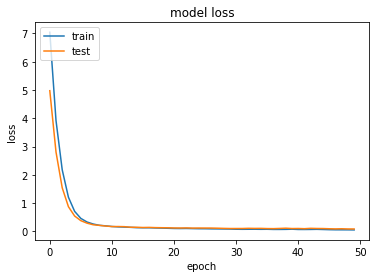

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

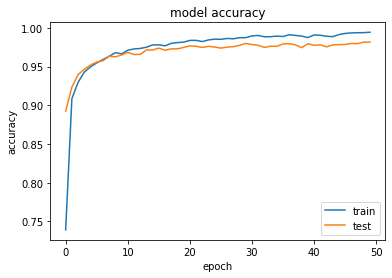

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

313/313 [==============================] - 2s 5ms/step
184 out of 10000 false classifications in test dataset ( 1.84 % )


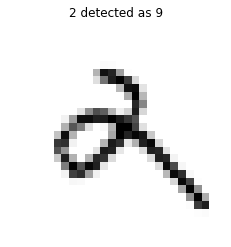

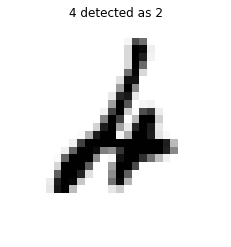

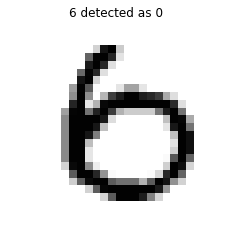

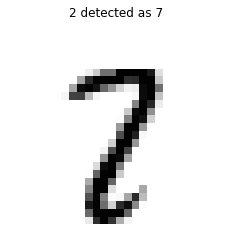

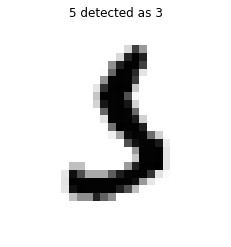

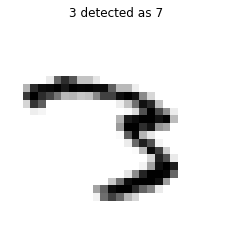

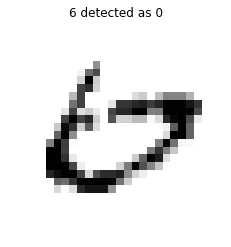

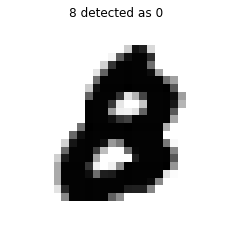

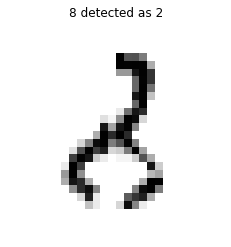

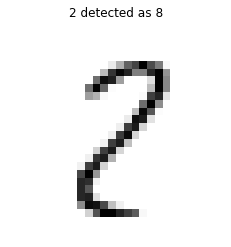

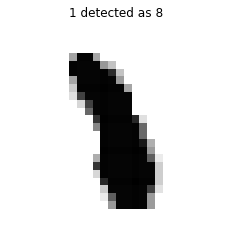

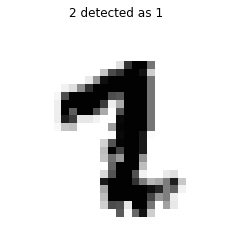

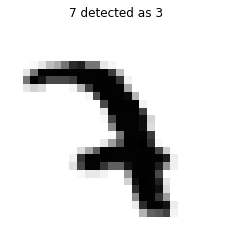

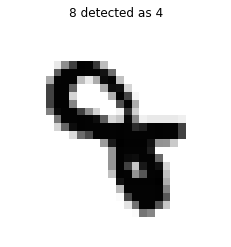

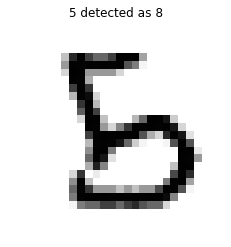

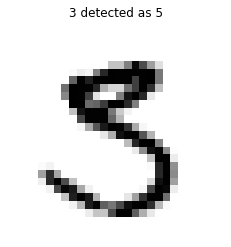

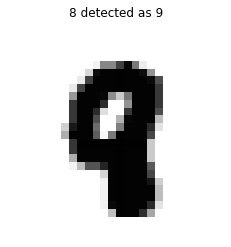

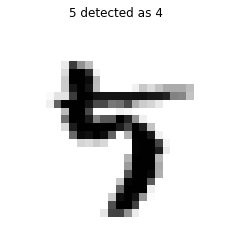

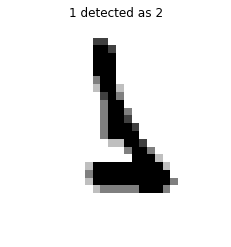

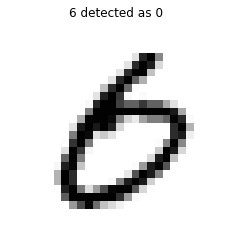

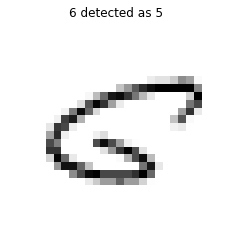

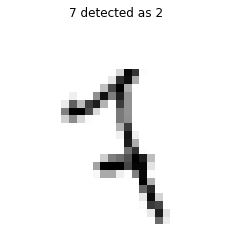

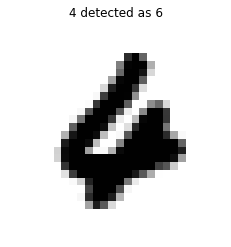

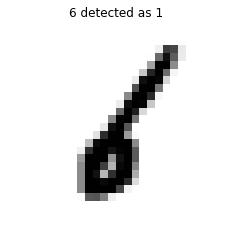

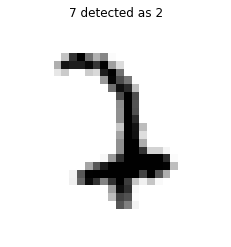

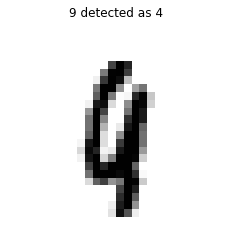

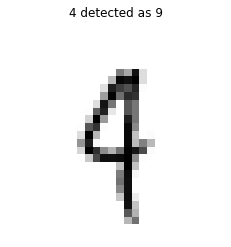

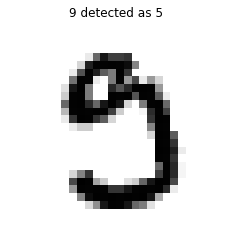

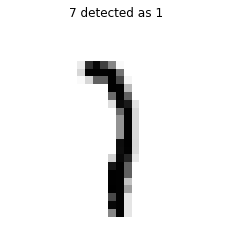

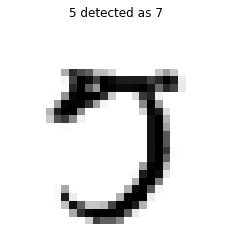

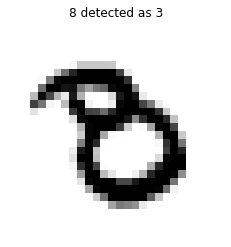

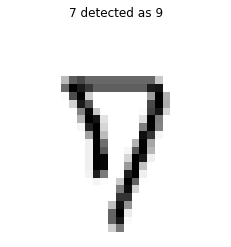

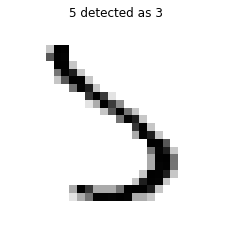

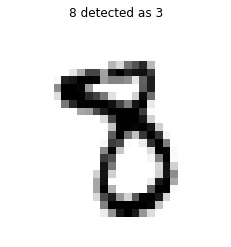

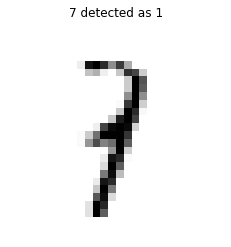

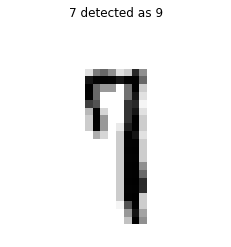

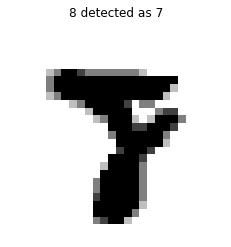

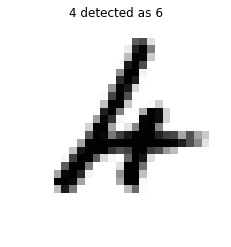

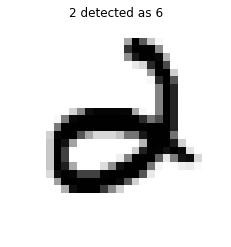

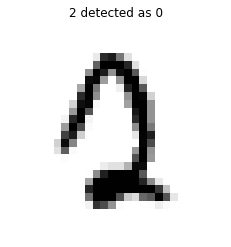

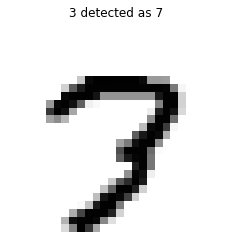

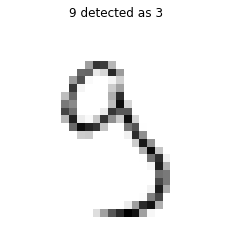

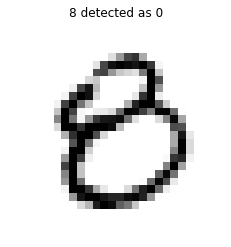

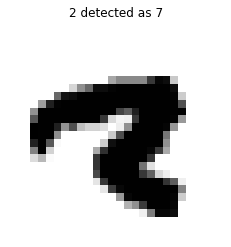

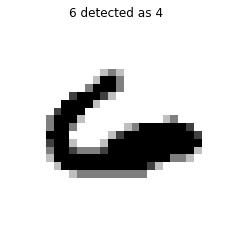

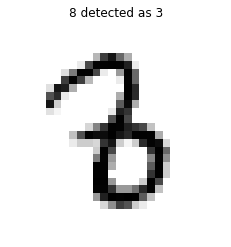

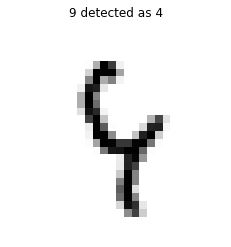

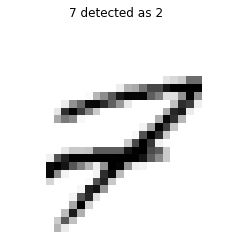

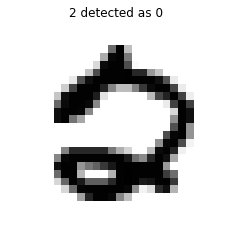

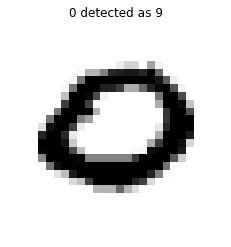

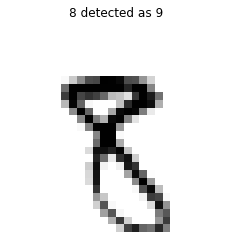

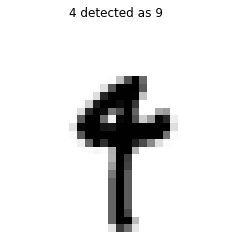

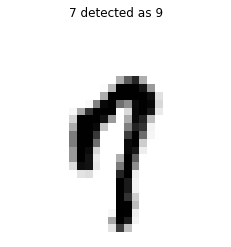

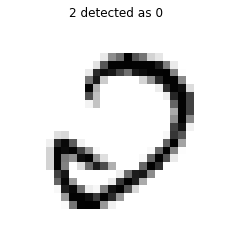

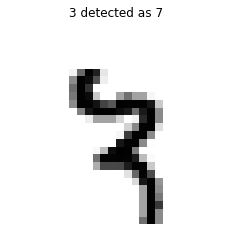

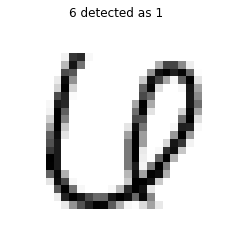

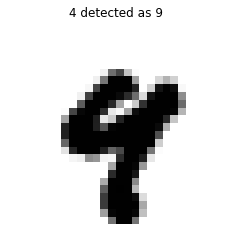

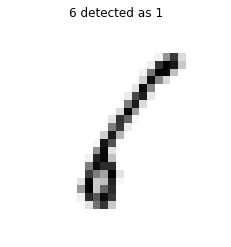

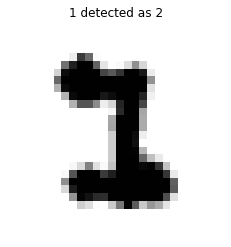

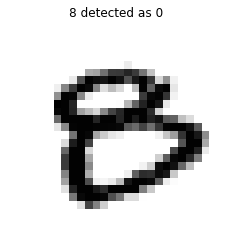

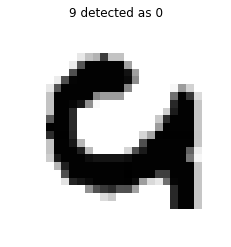

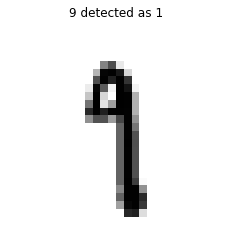

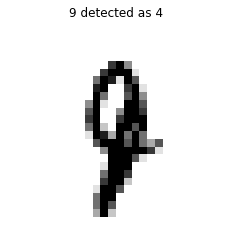

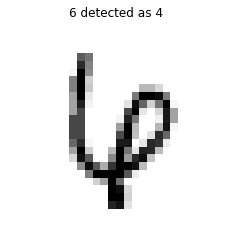

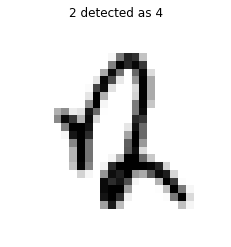

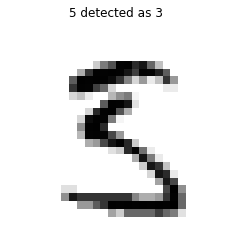

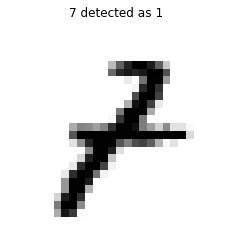

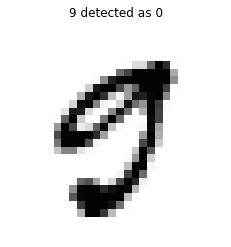

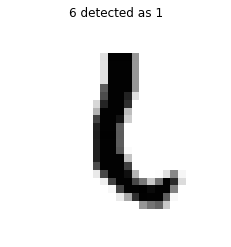

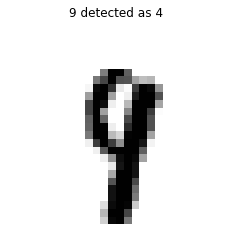

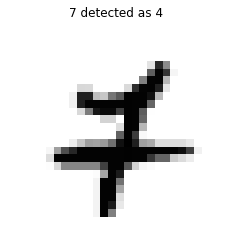

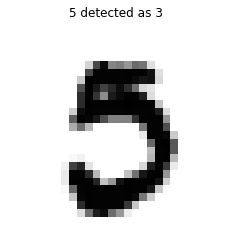

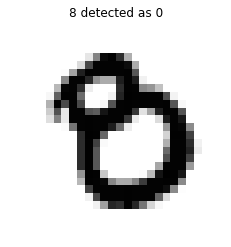

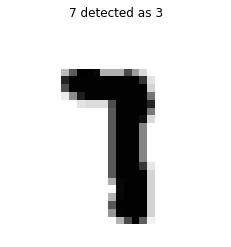

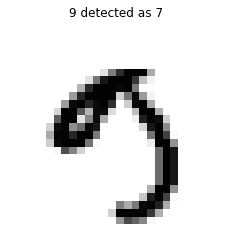

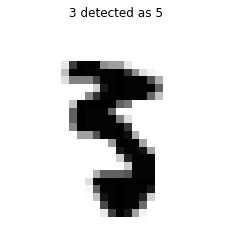

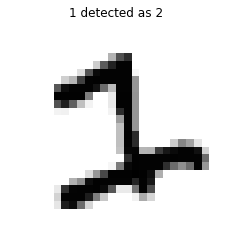

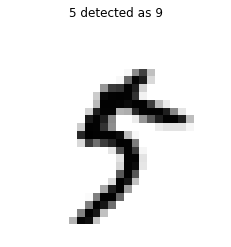

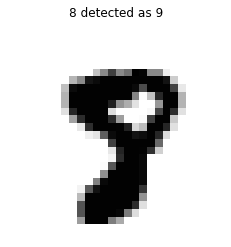

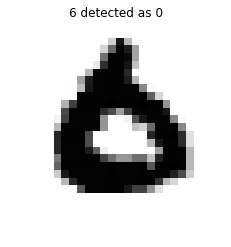

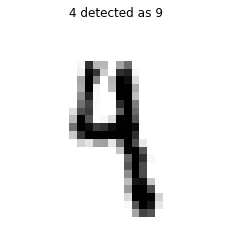

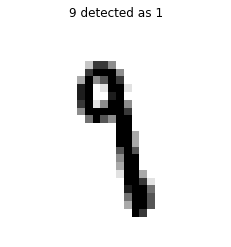

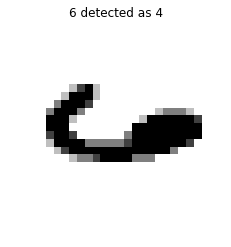

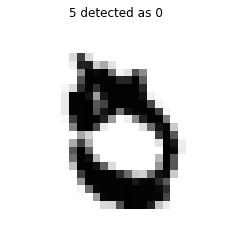

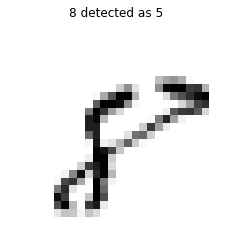

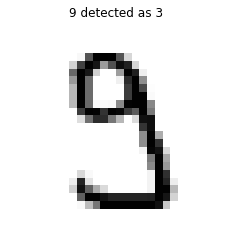

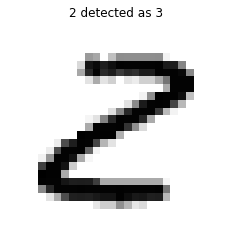

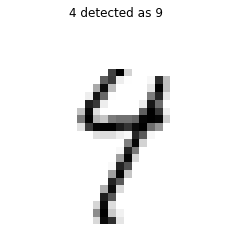

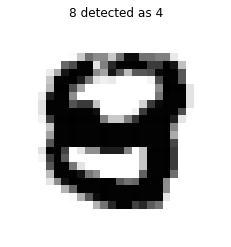

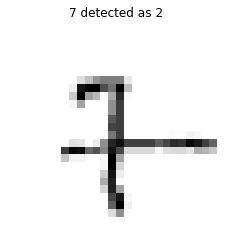

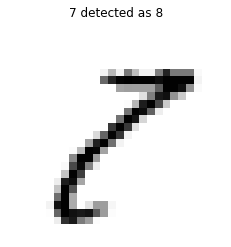

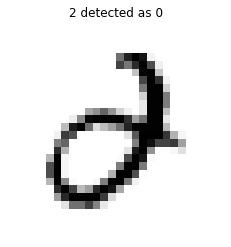

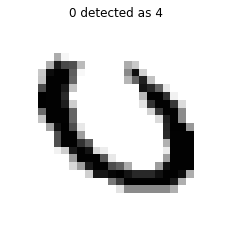

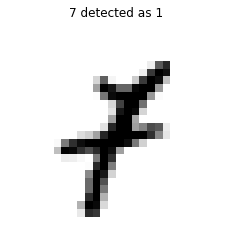

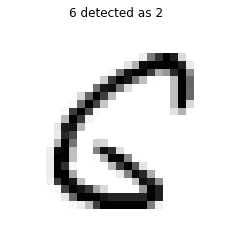

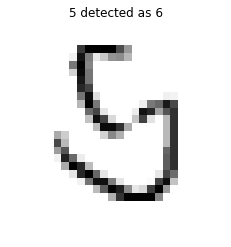

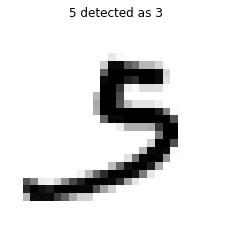

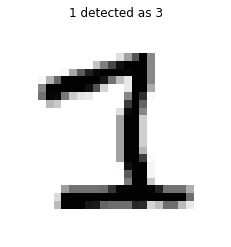

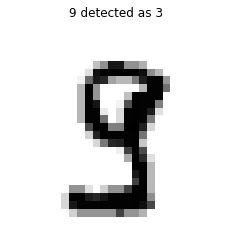

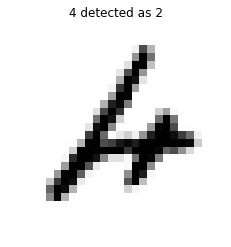

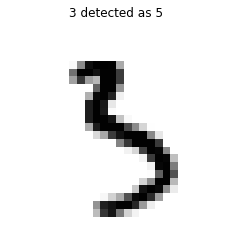

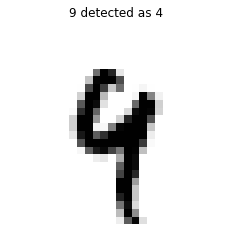

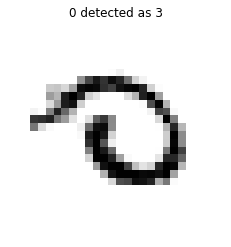

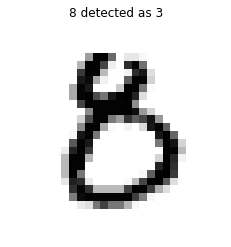

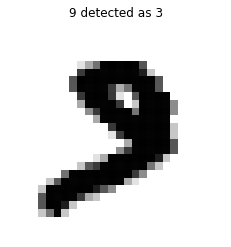

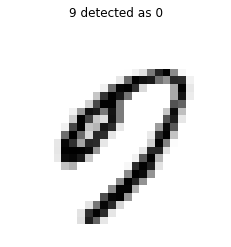

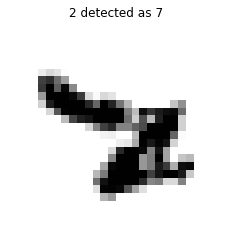

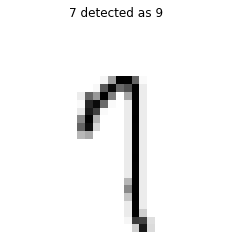

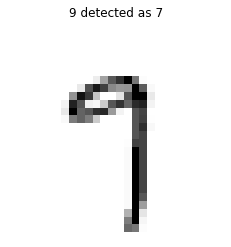

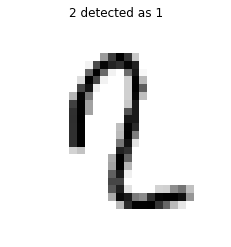

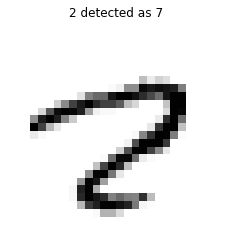

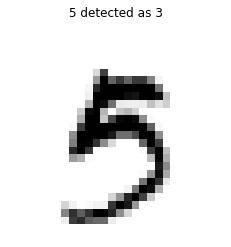

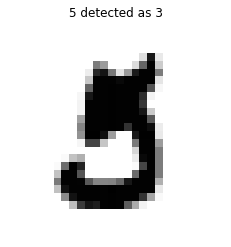

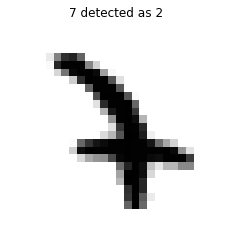

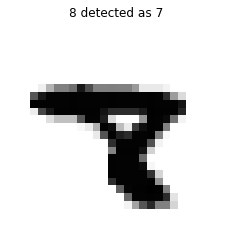

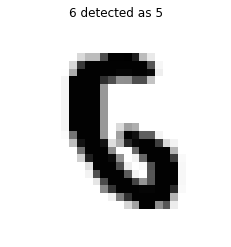

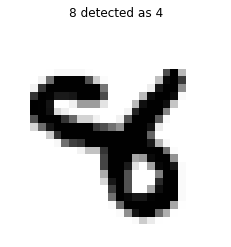

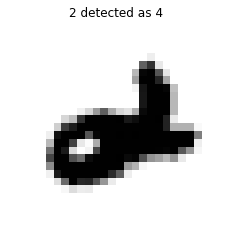

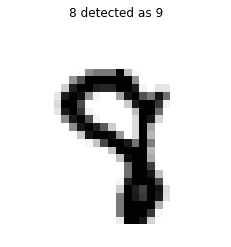

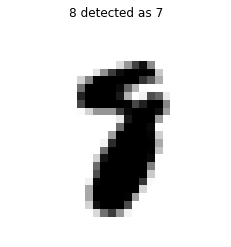

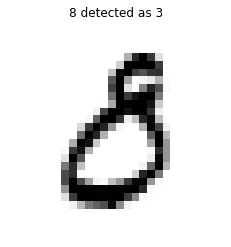

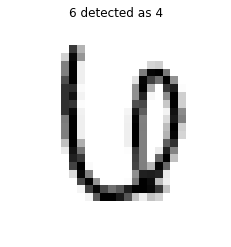

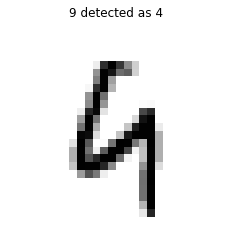

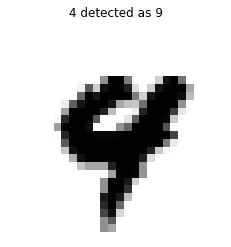

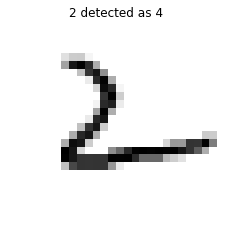

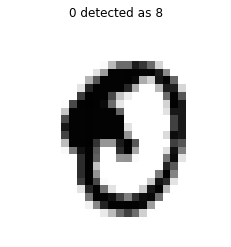

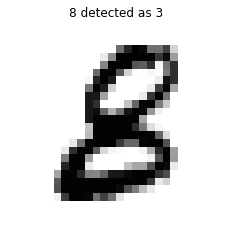

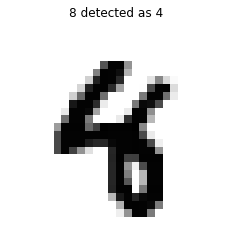

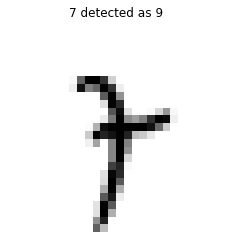

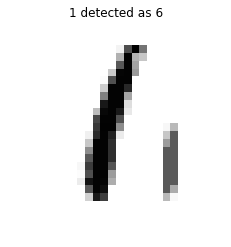

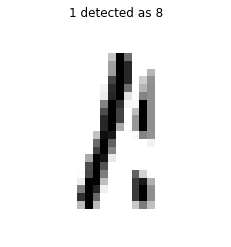

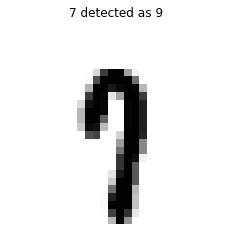

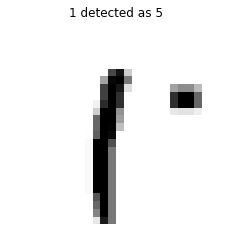

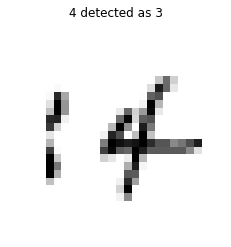

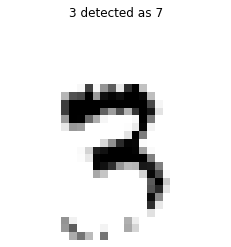

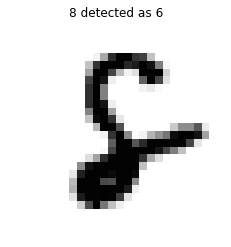

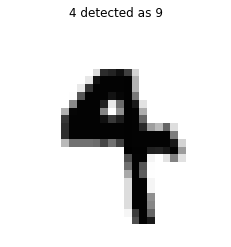

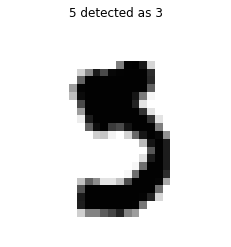

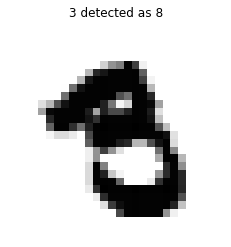

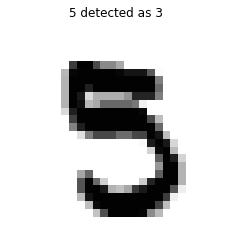

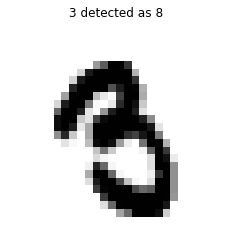

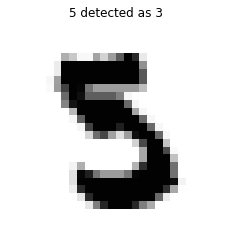

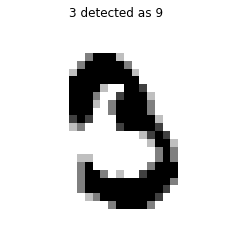

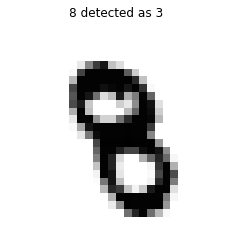

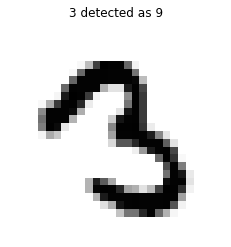

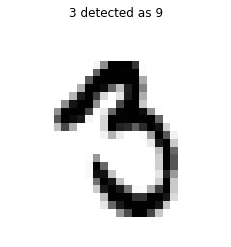

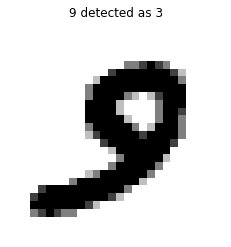

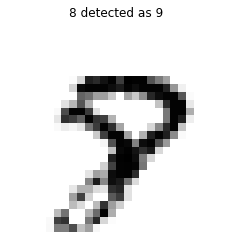

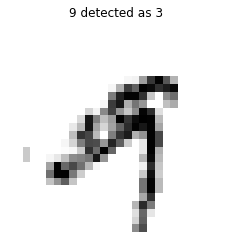

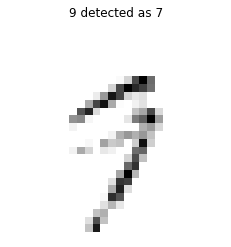

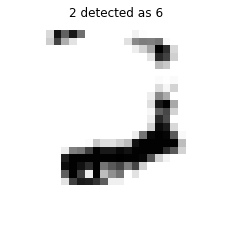

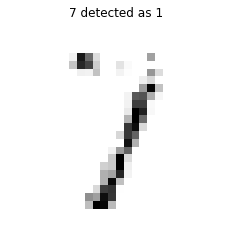

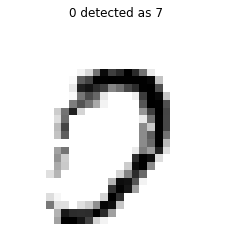

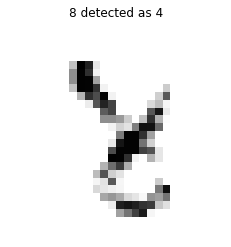

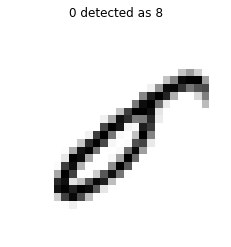

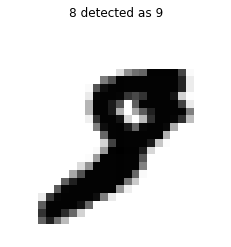

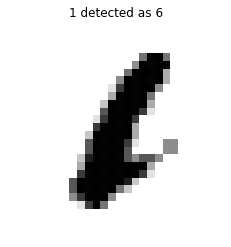

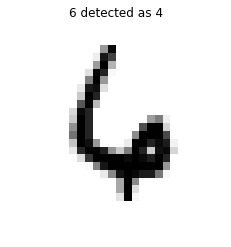

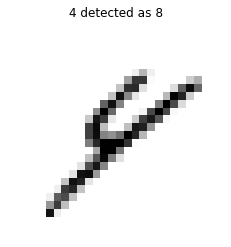

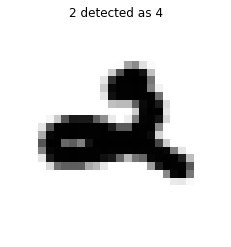

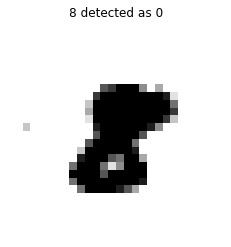

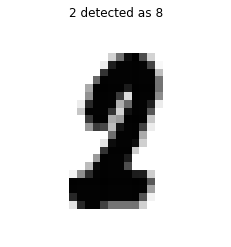

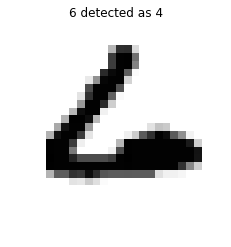

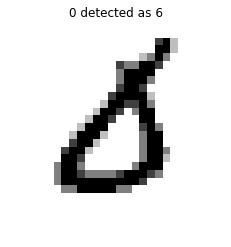

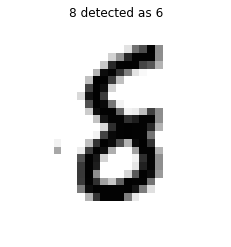

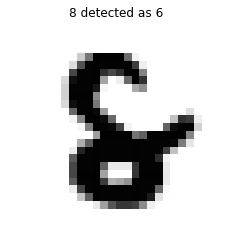

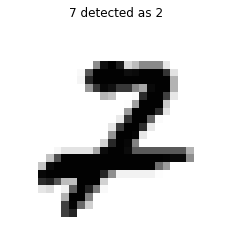

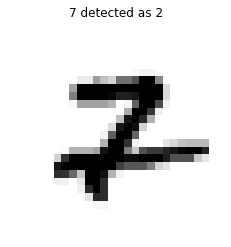

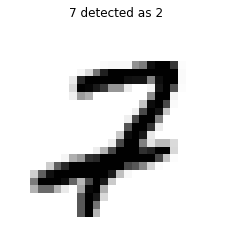

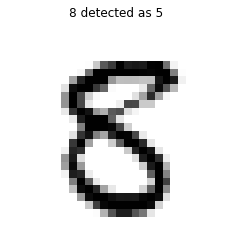

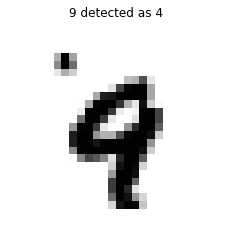

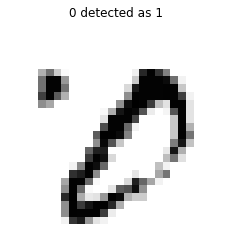

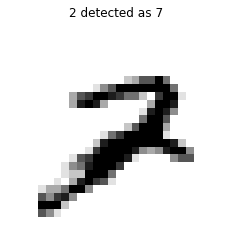

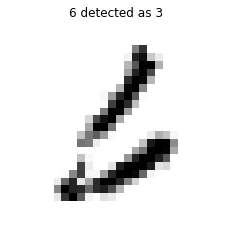

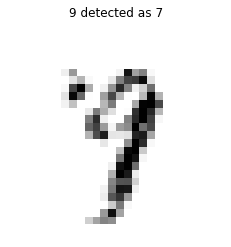

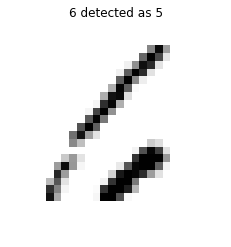

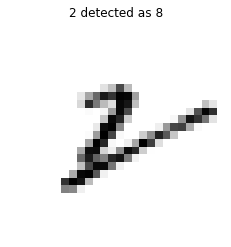

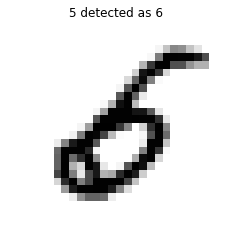

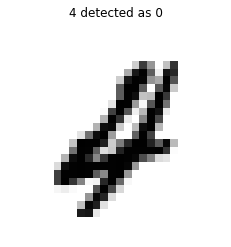

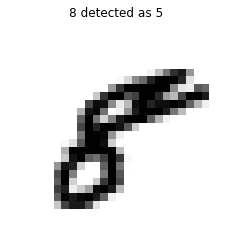

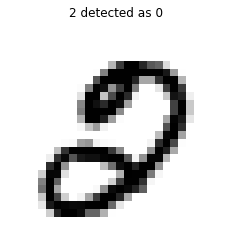

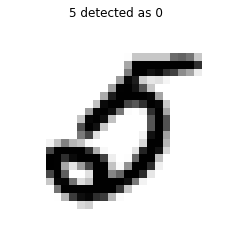

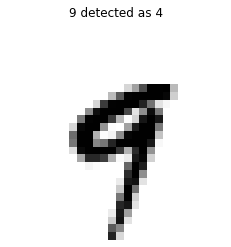

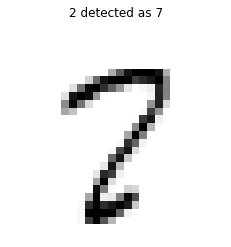

In [10]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()